In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import json
from pandas.io.json import json_normalize
import math

In [11]:

#import ujson
import codecs
from tqdm import tqdm
from nltk import word_tokenize
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import numpy as np

In [12]:
import json

In [13]:
file = open('dblp-ref-0.json','r')
file1 = open('dblp-ref-1.json','r')
file2 = open('dblp-ref-2.json','r')
file3 = open('dblp-ref-3.json','r')


In [14]:
count  = 0

In [ ]:
f = file.readlines()
f1 = file1.readlines()
f2 = file2.readlines()
f3 = file3.readlines()
data = []
f_count = 0
for fil in [f,f1,f2,f3]:
    print(f_count)
    f_count += 1
    for line in fil:
        data.append(json.loads(line.strip().replace("\n","")))
    

0
1
2


In [ ]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [ ]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))


In [8]:
dblp = pd.DataFrame(data)

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [3]:
dblp.head(1)

NameError: name 'dblp' is not defined

In [7]:
dblp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079007 entries, 0 to 3079006
Data columns (total 8 columns):
abstract      object
authors       object
id            object
n_citation    int64
references    object
title         object
venue         object
year          int64
dtypes: int64(2), object(6)
memory usage: 187.9+ MB


In [8]:
x = dblp.groupby('year')['title'].agg(['count']) 

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
#from matplotlib.pyplot import figure
#figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')


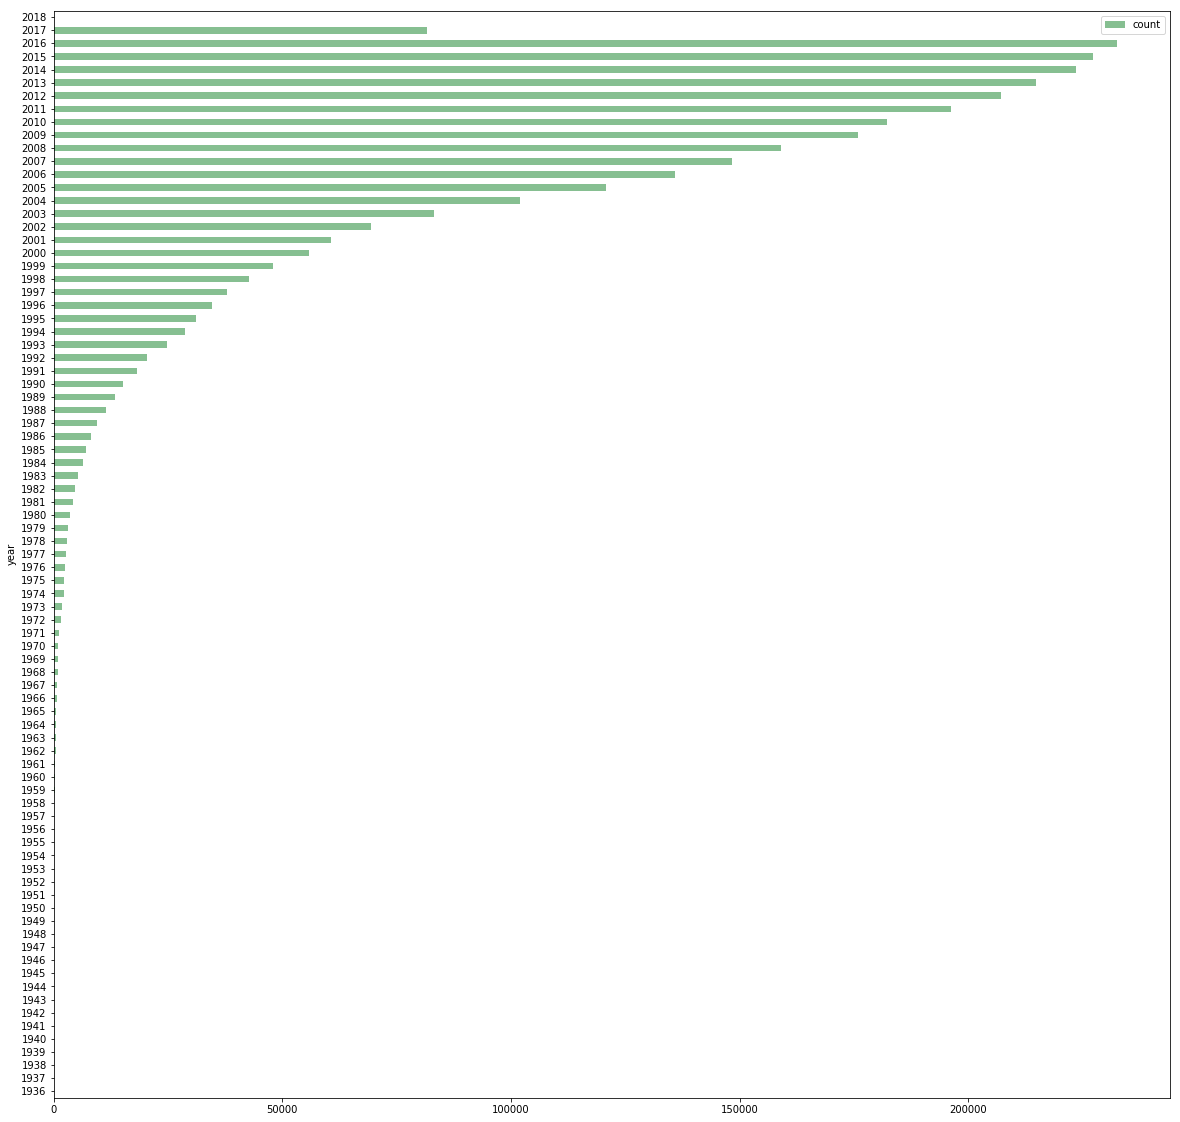

In [10]:
x.plot(kind='barh',figsize=(20, 20), color='#86bf91')

In [11]:
import seaborn as sns

In [12]:
import networkx as nx
from collections import defaultdict

In [13]:
dblp.iloc[0:10]['references']

0    [51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...
1    [10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...
2    [2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...
3    [8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...
4                                                  NaN
5                                                  NaN
6                                                  NaN
7    [5626736c-e434-4e2d-8405-54940fab88ab, 8e87e87...
8                                                  NaN
9    [3fcd7cdc-20e6-4ea3-a41c-db126fcc5cfe, bf3a11c...
Name: references, dtype: object

In [14]:
G = nx.DiGraph()
nodes = defaultdict(bool)

Data columns (total 8 columns):
abstract      753643 non-null object
authors       999997 non-null object
id            999997 non-null object
n_citation    999997 non-null int64
references    861477 non-null object
title         999997 non-null object
venue         999997 non-null object
year          999997 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB

In [15]:
dblp['references'].fillna(False, inplace=True)

In [16]:
edgelist = []

In [17]:
for i, row in dblp.iterrows():
    node = row['id']
    ref = row['references']
    
    if nodes[node]:
        pass
    else:
        nodes[node] = True
        G.add_node(str(node))
    if ref:
        for ver in ref:
            #print(node,ver)
            edgelist.append((node,ver))
    else:
        pass           

In [18]:
G.add_edges_from(edgelist)

In [19]:
#import pandas as pd
df = pd.DataFrame(edgelist, columns=['node1', 'node2'])
df.to_csv('list.csv', index=False)

In [20]:
edgelist[0]

('00127ee2-cb05-48ce-bc49-9de556b93346',
 '51c7e02e-f5ed-431a-8cf5-f761f266d4be')

In [21]:
ranks = nx.pagerank(G)

In [22]:
rank_df = pd.DataFrame.from_dict(ranks, orient='index')

In [23]:
rank_df.columns = ['rank']

In [24]:
rank_df.to_csv('rank.csv', index=True)

In [25]:
rank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3079007 entries, 00127ee2-cb05-48ce-bc49-9de556b93346 to ff941105-0890-447a-a15f-1623dec0870e
Data columns (total 1 columns):
rank    float64
dtypes: float64(1)
memory usage: 47.0+ MB


In [26]:
rank_df.nlargest(10,'rank')

,rank
6a6b9aa6-683f-4c7c-b06e-9c3018d10fd3,0.000623
c1b6b493-01ef-420f-be44-7bacfe34e846,0.000338
b944f77f-113b-4a02-ae5e-d4a124b8fd5b,0.000329
d3e00e7e-1c64-4d7a-b2b2-1ad98ba4c706,0.000221
f6bd8b64-684d-429a-aab5-8ff3a2c23cd6,0.000220
65d5ccdc-7022-45b0-adf9-0385273b1283,0.000205
62549bc2-e0b3-46e8-8d32-390dded105d5,0.000202
2659531e-eb9d-4dd5-b46f-10f66a4819c6,0.000192
1c63e1d5-b963-455b-829d-e4f3eb63a36a,0.000192
e0f3a738-4ab2-40d1-ba44-506d81c1d230,0.000187


In [95]:
dblp[dblp['id'] == 'b944f77f-113b-4a02-ae5e-d4a124b8fd5b']

,abstract,authors,id,n_citation,references,title,venue,year
2332760,This paper presents a method for extracting di...,[David G. Lowe],b944f77f-113b-4a02-ae5e-d4a124b8fd5b,42508,"[00a4e16f-6b65-4ad2-bedc-b19d9cbc2cfe, 01a0f82...",Distinctive Image Features from Scale-Invarian...,International Journal of Computer Vision,2004


In [ ]:
dblp[dblp['id'] == '65d5ccdc-7022-45b0-adf9-0385273b1283']

In [ ]:
dblp.nlargest(10,'n_citation')

In [27]:
author_page = defaultdict(float)
author_cit = defaultdict(int)
count = 0
for i, row in dblp.iterrows():
    node = row['id']
    authors = row['authors']
    n_citation = row['n_citation']
    try:
        n_auth = len(authors)
    except Exception:
        continue
    page_rank = rank_df.loc[[node]]['rank'].values
    page_rank = page_rank[0]/n_auth
    #rank_df['index']
    if count % 10000 == 0:
        print(node)
    count += 1
    for author in authors:
        #print(node,ver)
        author_page[author] += page_rank
        author_cit[author] += n_citation
        
        

00127ee2-cb05-48ce-bc49-9de556b93346
00053ae1-28bd-4dd0-98ee-00a1d7ae42a6
00223b1f-17ca-47bc-bc49-444fe8524ae4
aa06efe4-427f-4487-98ce-122727732a86
95fb92f0-c8db-4dcf-86fc-4b71dc8dd297
887f8a09-db8f-4429-981c-2173631aafb0
74e84440-010b-49e8-85f6-9dac6daf60c9
5e279b68-0091-420a-9503-2c08ad151c43
41268810-8fcb-40b0-aae2-9d7a6bf2ab89
32aac0fb-b5c1-40d9-a894-fff8fbd31698
1bc9ff10-5cc7-4a56-b1ec-b72631ab5aff
079af1d2-4f8a-4c56-a1a1-e461ad710319
000b8ceb-dbfc-466e-bf32-950089173020
00675425-4ecc-4d03-897b-3304fef0d9c5
000d6c21-5ad9-425c-8bba-23ccd5efccf8
00084794-80c5-4e04-a6e8-db576c8384dd
a52a3206-01b2-4fdf-bae4-c01e029d5999
89677ec3-ca4c-4505-a5b2-4bc86536b22e
6c79af8d-0a9a-4472-a59e-ea5971961cee
6791bbf7-bc0b-4cbf-b4df-bd16fa3910ae
e80ea297-5f79-4789-80f7-95df5c64d22b
000ccd64-b58d-4122-9fd8-c7d0aafb2f33
4dd57484-8f0e-4f0c-955d-c89bd785e620
09c843a4-b6cf-48cb-83a2-99a15f9a0166
04611c85-60db-4a43-8473-2a4fab6e8bc7
0c6ef8ac-3bde-4e6c-b105-99eb9945ef9a
14a1a7fa-1bc4-4d26-940c-a26a216c0995
1

93bc356c-06c6-4fea-aaaf-b85d2ee103b1
970502fa-ac79-4bc2-86a4-d733f7080bf2
9a5c3283-4bc2-4716-94d1-6462749f58ed
9dadf246-5716-48b7-93ee-7cd54e4a6a6f
a0f9d68d-9e05-4517-8951-7d61cc8557d2
a44bb29f-2057-4f99-9e4a-b78811d8c254
a7a79dfd-ff9f-467d-9867-1aedadb443a4
aaee05a3-ebf1-4043-a636-1f382c36e8db
ae591a12-adce-475b-b1a4-94dea5065749
b1af9cd9-c7c9-4c0c-8325-a66c6be77c9f
b50d225a-15e4-4e99-b62d-ab27f2ab1a2d
b85e7238-9bf5-4bed-8bbf-319ecaacb0d4
bb9fbd1c-2a6a-4d9e-b5fd-0de059db9bed
beecf905-93cf-4966-8554-47104af52ef5
c2520f9f-603c-4a64-b376-f3236c1947ae
c593bef9-4f07-4b62-a5c4-6f8af53f55d9
c8e718a8-587a-4031-ab46-5cfc81c5919c
cc2e3d78-8d27-41c8-af81-e46621196d04
cf7f4d24-a4c7-433f-bde0-bc9e5524163d
d2d64ef0-cfb9-430f-b4d3-a493697eca5b
d6382c06-5de2-4b4e-b6b1-5ed082b52f83
d98bc849-1aac-4769-afb3-e5b7d8f5fa70
dcd73b31-195c-452c-9fea-0a0c3175c763
e02556f6-0709-48d7-912a-ebf027d0d56b
e37c8a1e-155a-4c9c-abcb-4440937fe63a
e6dcd7eb-8b3c-4b64-9982-7dfa636c1151
ea398fa5-3202-41bd-a5d7-7218eb329f11
e

In [28]:
dblp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079007 entries, 0 to 3079006
Data columns (total 8 columns):
abstract      object
authors       object
id            object
n_citation    int64
references    object
title         object
venue         object
year          int64
dtypes: int64(2), object(6)
memory usage: 187.9+ MB


In [ ]:
# #rank_df.'65d5ccdc-7022-45b0-adf9-0385273b1283'


# r = rank_df.loc[['65d5ccdc-7022-45b0-adf9-0385273b1283']]['rank'].values

# r = r[0]
# print(r)

In [ ]:
#print(l)

In [29]:
authour_page_df = pd.DataFrame.from_dict(author_page, orient='index')

In [30]:
authour_page_df.columns= ['Cum_Page_Rank']

In [31]:
authour_page_df.head(1)

,Cum_Page_Rank
Makoto Satoh,1.296245e-07


In [32]:
authour_page_df.nlargest(10,'Cum_Page_Rank')

,Cum_Page_Rank
David E. Goldberg,0.000752
David G. Lowe,0.000504
Anil K. Jain,0.000421
Lotfi A. Zadeh,0.000408
Judea Pearl,0.000364
Leo Breiman,0.000362
Adi Shamir,0.000357
Ronald R. Yager,0.000311
Leslie Lamport,0.000306
David L. Donoho,0.000293


In [33]:
authour_cit_df = pd.DataFrame.from_dict(author_cit, orient='index')

In [34]:
authour_cit_df.columns= ['num_cit']

In [35]:
authour_cit_df.nlargest(10,'num_cit')

,num_cit
Anil K. Jain,121850
David E. Goldberg,113375
Hari Balakrishnan,109682
Scott Shenker,96827
Jiawei Han,95502
Philip S. Yu,88340
Geoffrey E. Hinton,83801
Rakesh Agrawal,83186
Michael I. Jordan,82241
Deborah Estrin,81389


In [36]:
authour_cit_df.head(10)

,num_cit
Makoto Satoh,102
Ryo Muramatsu,0
Mizue Kayama,655
Kazunori Itoh,364
Masami Hashimoto,153
Makoto Otani,483
Michio Shimizu,260
Masahiko Sugimoto,200
Gareth Beale,110
Graeme Earl,565


In [37]:
authour_page_df['num_citation'] = authour_cit_df['num_cit']

In [ ]:
authour_page_df.loc['Deborah Estrin']

In [38]:
authour_page_df.to_csv('author_rank.csv', index=True)

In [61]:
dblp.to_csv('dblp_data.csv', index = False)

In [ ]:
authour_page_df.info()

In [39]:
del authour_cit_df

In [82]:
authors_dict = defaultdict(bool)

In [83]:
A = nx.DiGraph()

In [84]:
edgelist_A = defaultdict(list)

In [ ]:
dblp['ref_authors'] = dblp['references'].apply(lambda row: if for re in row dblp[dblp['id'] == re].authors.values[0])

In [81]:
count = 0
for i, row in dblp.iterrows():
    node = row['id']
    authors = row['authors']
    ref = row['references']
    if authors_dict[node]:
        pass
    else:
        authors_dict[node] = True
        A.add_node(str(node))
    try:
        n_auth = len(authors)
    except Exception:
        continue
    out_authors = []
    if count % 100 == 0:
            print(node)
    count += 1
    if ref:
        for re in ref:
            out_authors += dblp[dblp['id'] == re].authors.values[0]
        for author in authors:
            #res = list(set(edgelist_A[author] + out_authors))
            edgelist_A[author] += out_authors
    else:
        pass                    

00127ee2-cb05-48ce-bc49-9de556b93346


KeyboardInterrupt: 

In [ ]:
auth_df = pd.DataFrame(edgelist, columns=['node1', 'node2'])
auth_df.to_csv('auth_df.csv', index=False)

In [ ]:
dblp[dbpl['id'] == re].authors.values

In [41]:
dblp.iloc[0:3]['references']

0    [51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...
1    [10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...
2    [2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...
Name: references, dtype: object

In [75]:
auth = dblp[dblp['id'] == '51c7e02e-f5ed-431a-8cf5-f761f266d4be'].authors.values[0]


In [88]:
result  = dblp.iloc[0:5]['references'].apply(lambda row:[a for re in row: a += dblp[dblp['id'] == re].authors.values[0]])

SyntaxError: invalid syntax (<ipython-input-88-23d023ec88bb>, line 1)

In [91]:
def author_list(references):
    if references:
        out_authors = []
        for re in ref:
            out_authors += dblp[dblp['id'] == re].authors.values[0]
        return list(set(out_authors))
    else:
        return references        

In [92]:
auth_list =  dblp.iloc[0:5]['references'].apply(author_list)

In [96]:
dblp.head(1)

,abstract,authors,id,n_citation,references,title,venue,year
0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013


In [97]:
id_author_map = defaultdict(list)

In [98]:
a_count = 0
for i, row in dblp.iterrows():
    if a_count%100000 == 0:
        print(a_count)
    a_count += 1
    try:
        n_auth = len(authors)
        node = row['id']
        authors = row['authors']
        id_author_map[node] += authors
    except Exception:
        continue


0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000


In [99]:
edgelist_A= defaultdict(list)
authors_dict = defaultdict(bool)
A = nx.DiGraph()

In [ ]:
s_count = 0
for i, row in dblp.iterrows():
    node = row['id']
    authors = row['authors']
    ref = row['references']
    if authors_dict[node]:
        pass
    else:
        authors_dict[node] = True
        A.add_node(str(node))
    try:
        n_auth = len(authors)
    except Exception:
        continue
    out_authors = []
    if s_count % 10000 == 0:
            print(s_count)
    s_count += 1
    if ref:
        for re in ref:
            out_authors += id_author_map[re]
        #out_authors = list(set(out_authors))    
        for author in authors:
            res = list(set(edgelist_A[author] + out_authors))
            edgelist_A[author] = res
    else:
        pass             

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000


In [3]:
author_final_df = pd.read_csv('with_ranks.csv')

In [4]:
result_df = author_final_df.nlargest(100,'Cum_Page_Rank')

In [9]:
author_final_df.nlargest(10,'centrality')

,Author,Cum_Page_Rank,num_citation,centrality,hindex,Metric_Rank,Citation_Rank,Centrality_Rank,hindex_Rank
3234,David E. Goldberg,0.000752,113375,0.021863,73,1,2,1.0,166
75171,Rakesh Agrawal,0.000274,83186,0.013545,84,12,8,2.0,71
45636,Anil K. Jain,0.000421,121850,0.012705,144,3,1,3.0,1
11897,Luc J. Van Gool,0.000120,69100,0.012641,83,159,25,4.0,76
18761,Gerard Salton,0.000231,50133,0.012549,50,24,60,5.0,4035
7025,Andrew Zisserman,0.000187,78278,0.012348,123,48,12,6.0,4
62201,Christopher D. Manning,0.000124,51756,0.011506,82,149,54,7.0,82
22366,Christos Faloutsos,0.000183,70392,0.010630,112,54,23,8.0,10
47786,Adi Shamir,0.000357,55714,0.010472,63,7,43,9.0,385
35741,Prabhakar Raghavan,0.000098,41301,0.010442,55,272,105,10.0,696


In [11]:
import pyltr

/Users/abhishekreddyyn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
